In [1]:
import torch
import torch.nn as nn

import numpy as np

In [47]:
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

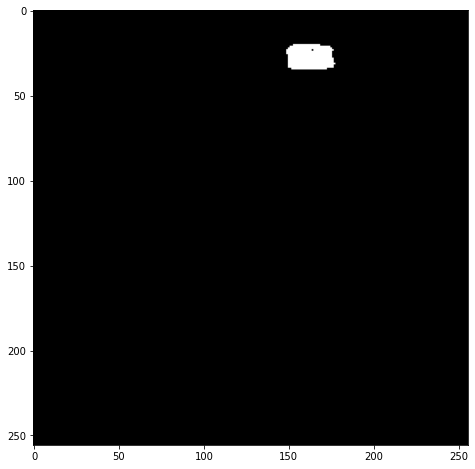

In [31]:
image_path = os.path.expanduser("~/workspace/us_robot/DataSet/realDataSet/linear/vessel_pred2/pred000.png")
#image = Image.open(image_path).convert('L')
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 127, 255, 0)
plt.figure(figsize=(8, 8))
plt.imshow(image,'gray')

In [32]:
image.shape

(256, 256)

In [33]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [53]:
contours[0].reshape([-1,2]).astype(np.uint8)

array([[153, 152, 151, 150, 149, 149, 149, 150, 150, 150, 150, 150, 150,
        150, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 176, 177, 176, 176, 176, 175, 175, 175, 175, 176, 175,
        174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162,
        161, 160, 159, 158, 157, 156, 155, 154],
       [ 20,  21,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  33,  34,  34,  34,  34,  34,  34,  34,  34,  34,  34,
         34,  34,  34,  34,  34,  34,  34,  34,  34,  34,  34,  33,  33,
         33,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
         21,  21,  21,  21,  21,  21,  20,  20,  20,  20,  20,  20,  20,
         20,  20,  20,  20,  20,  20,  20,  20]], dtype=uint8)

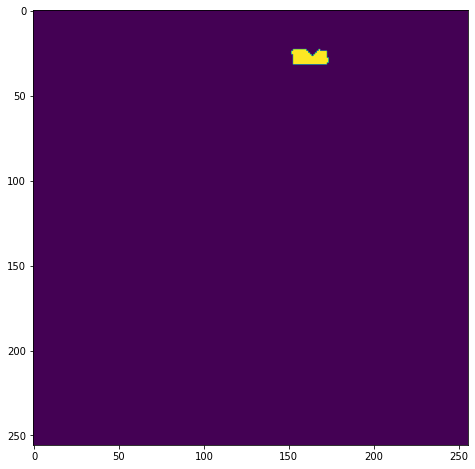

In [34]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.drawContours(image, contours, -1, (0,255,0), 3))

## Image Preprocessing

In [2]:
import os
import torchvision.transforms as transforms
from PIL import Image

In [6]:
image_path = os.path.expanduser("~/workspace/us_robot/DataSet/realDataSet/linear/vessel_dataset/label/label0001.png")
image = Image.open(image_path).convert('L')
resize_to = [256,256]

transform = transforms.Compose([
        transforms.Resize(resize_to),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
        ])
print("shape: ", image.size)
img = transform(image)
print("shape: ", img.shape)
print("max pixel value: ", torch.max(img))

shape:  (256, 256)
shape:  torch.Size([1, 256, 256])
max pixel value:  tensor(-0.9922)


In [7]:
image_path = os.path.expanduser("~/workspace/us_robot/DataSet/realDataSet/linear/vessel_dataset/label/label0001.png")
image = Image.open(image_path).convert('L')

img = torch.Tensor(np.array(image))
print("shape: ", img.shape)
print("max pixel value: ", torch.max(img))

shape:  torch.Size([256, 256])
max pixel value:  tensor(1.)


## Normal Vector Optimizer

In [2]:
Data = torch.Tensor([[1,0,0],[0,1,0],[-1,0,0],[0,-1,0],[1,0,1],[0,1,1],[-1,0,1],[0,-1,1]]).view([8,3,1])
n1 = torch.randn(1, requires_grad=True, dtype=torch.float)
n2 = torch.randn(1, requires_grad=True, dtype=torch.float)

In [16]:
def radi(n):
    return sum([(Data[i,0]*n[1]-Data[i,1]*n[0])**2+(Data[i,1]*n[2]-Data[i,2]*n[1])**2+(Data[i,2]*n[0]-Data[i,0]*n[2])**2  for i in range(Data.shape[0])])

In [ ]:
def var_loss(n):
    torch.cross(Data,n)

In [ ]:

torch.cross(Data,n)

In [17]:
optim = torch.optim.RMSprop([n1,n2],lr = 0.1)

In [18]:
radi([n1,n2,1])

tensor(0.3775)

In [19]:
for ep in range(50):
    #print("ep",ep)
    optim.zero_grad()
    loss = radi([n1,n2,1])
    #print(loss)
    loss.backward()
    optim.step()

print("n = ",n1.item(),n2.item(),1)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [33]:
print(n1,n2,1)

tensor([-6.5564e-16], requires_grad=True) tensor([1.1065e-29], requires_grad=True) 1
